# Predicting heart disease using machine learning

This notebook looks into various python- based machine learning and data science librariries in an attempt to build a model capable of preddicting wheether or not someone has heart disease depending on  certain medical attributes.

Approach :
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient's medical attributes predict whether or not somwone has heart disease


## 2. Data
The original data came from the Cleaveland data from the UCI Machine Learning Repository.
[Cleveland dataset](https://archive.ics.uci.edu/ml/datasets/heart+Disease) 


A version also exists on [Kaggle](https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset)

## 3. Evaluation

> If we can reach 95% accuracy at predicting whehter or not a patient has heart disease during he proof of concept, we'll pursue the project

## 4. Features 

Here , we get different information about each of the features in our data

 **DATA DICTIONARY**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    0: Typical angina: chest pain related decrease blood supply to the heart
    1: Atypical angina: chest pain not related to heart
    2: Non-anginal pain: typically esophageal spasms (non heart related)
    3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
6. serum = LDL + HDL + .2 * triglycerides
    above 200 is cause for concern
7. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    '>126' mg/dL signals diabetes
8. restecg - resting electrocardiographic results
    0: Nothing to note
    1: ST-T Wave abnormality
    can range from mild symptoms to severe problems
    signals non-normal heart beat
    2: Possible or definite left ventricular hypertrophy
    Enlarged heart's main pumping chamber
9. thalach - maximum heart rate achieved
10. exang - exercise induced angina (1 = yes; 0 = no)
11. oldpeak - ST depression induced by exercise relative to rest
    looks at stress of heart during excercise
    unhealthy heart will stress more
12. slope - the slope of the peak exercise ST segment
    0: Upsloping: better heart rate with excercise (uncommon)
    1: Flatsloping: minimal change (typical healthy heart)
    2: Downslopins: signs of unhealthy heart
13. ca - number of major vessels (0-3) colored by flourosopy
    colored vessel means the doctor can see the blood passing through
    the more blood movement the better (no clots)
14. thal - thalium stress result
    1,3: normal
    6: fixed defect: used to be defect but ok now
    7: reversable defect: no proper blood movement when excercising
15. target - have disease or not (1=yes, 0=no) (= the predicted attribute)rt diseasele defect)

Target : 0 No Heart disease

## Preparing the tools 

Tools- Pandas, Matplotlib and Numpy for data analysis and manipulation

In [114]:
# Import all the tools we need 

#Reguar EDA and plotting libraries
import pandas as pd 
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns 
#we want the plots to appear in the notebook
%matplotlib inline

#Models from scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay 

## Load Data

In [5]:
df = pd.read_csv("Data/heart-disease.csv")
df.shape #shows the rows and columns

(303, 14)

 # Data Exploration
We try to find more about the data and familiarise with the dataset

1. What question(s) are we trying to solve?
2. What kind of data do we have and how do we treat them?
3. What's missing from the data and how do we deal with it?
4. Where are the outliers and why should we care about them ?
5. How can we add, change or remove features to get more out of the data?

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
# how many classes are there?
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

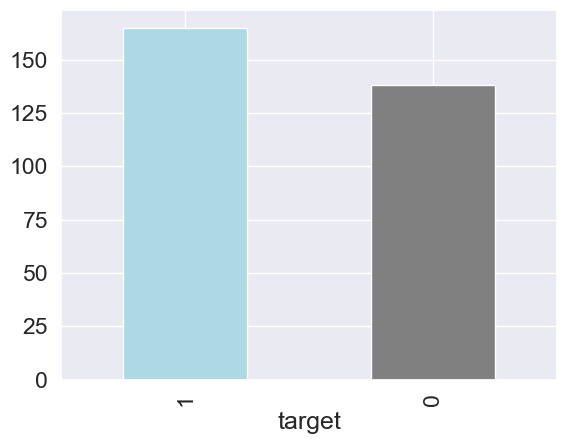

In [146]:
df["target"].value_counts().plot(kind="bar", color =["lightblue", "grey"])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# We try to compare columns

# Heart Disease Frequency accoriding to Sex

In [13]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [14]:
#Compare target column with sex
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


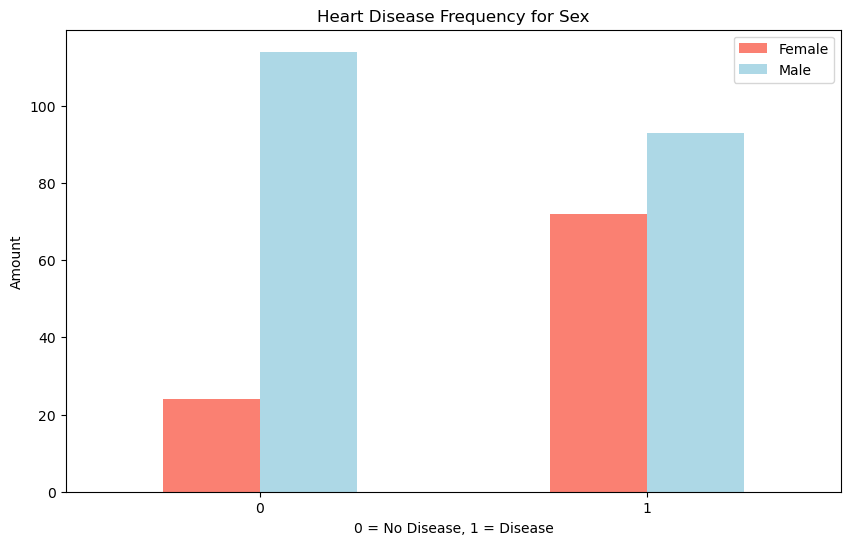

In [15]:
 #create a plot  of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

## Heart Disease according to Fasting Blood Sugar(FBS)

In [16]:
df.fbs.value_counts()

fbs
0    258
1     45
Name: count, dtype: int64

In [17]:
#compare fastingbloodsugar with target column
pd.crosstab(df["target"], df["fbs"])

fbs,0,1
target,,
0,116,22
1,142,23


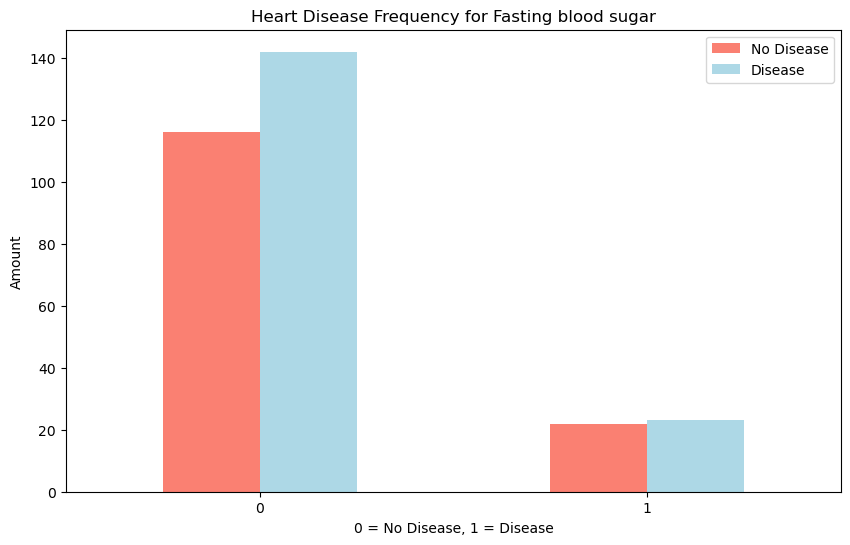

In [18]:
pd.crosstab(df["fbs"], df["target"]).plot(kind ="bar", 
                                          figsize=(10,6),
                                          color=["salmon", "lightblue"])


plt.title("Heart Disease Frequency for Fasting blood sugar")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"]);
plt.xticks(rotation=0);

## Age vs MAX Heart Rate for HeartDisease


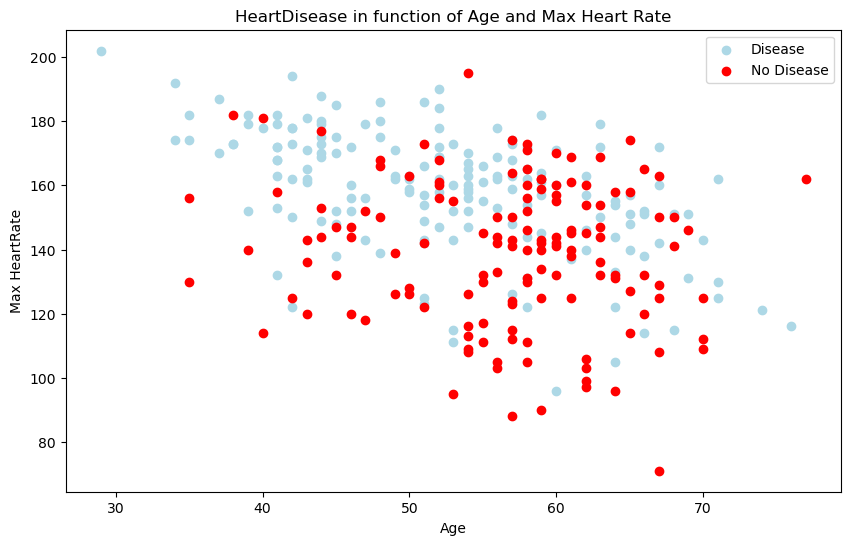

In [19]:
#Create another figure 
plt.figure(figsize=(10,6))

#sScatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="lightblue")

# Scatter with negative example 
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="red");

plt.title("HeartDisease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max HeartRate")
plt.legend(["Disease", "No Disease"]);

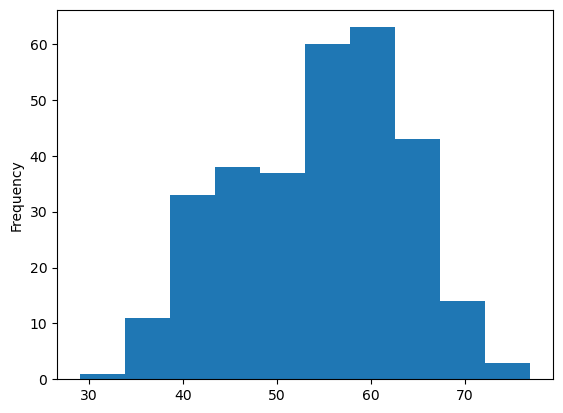

In [20]:
#check the distribution of the age column with a histogram
df.age.plot.hist();

### Heart Disease Frequency per Chest Pain Type

cp - chest pain type

* 
0: Typical angina: chest pain related decrease blood supply to the hear
  t* 
1: Atypical angina: chest pain not related to hea
 
* t
2: Non-anginal pain: typically esophageal spasms (non heart relat
  e* d)
3: Asymptomatic: chest pain not showing signs of disease

In [21]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


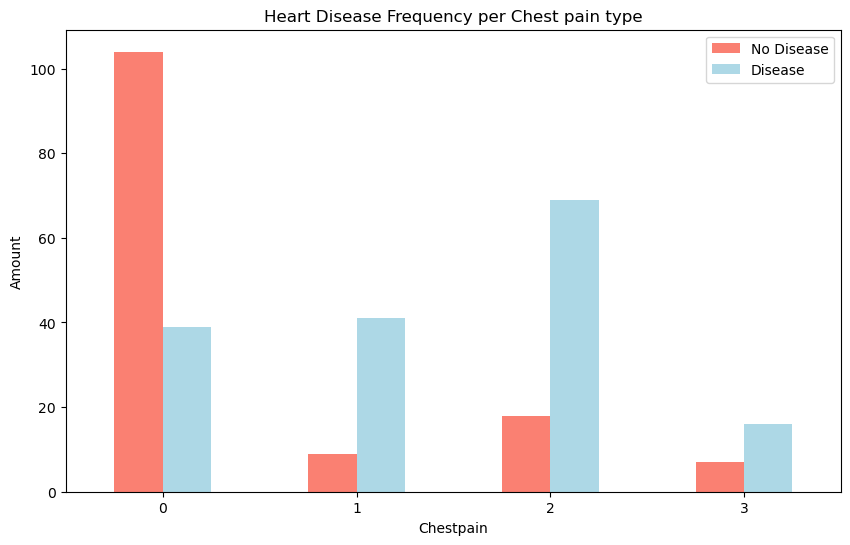

In [22]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency per Chest pain type")
plt.xlabel("Chestpain")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [23]:
#Make a correlation matrix
#To establish realtionship with variables 
df.corr()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


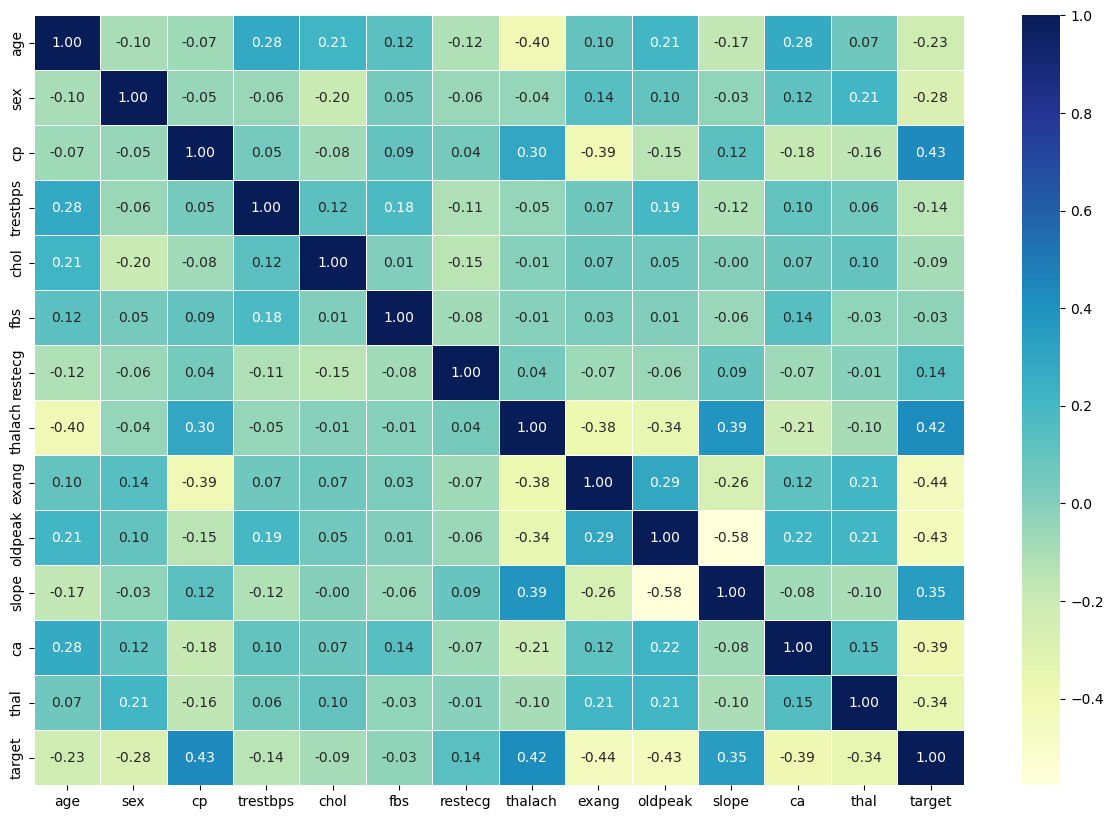

In [24]:
# Making the correlation matrix more visual 
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt = ".2f",
                 cmap ="YlGnBu");



## Modelling

In [25]:
#split the data into X and y
X= df.drop("target", axis =1)
y = df["target"]

In [26]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [27]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [28]:
# Split the data into train and test sets
np.random.seed(42)

#Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2)

In [29]:
X_train, len(X_train)

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 132   42    1   1       120   295    0        1      162      0      0.0   
 202   58    1   0       150   270    0        0      111      1      0.8   
 196   46    1   2       150   231    0        1      147      0      3.6   
 75    55    0   1       135   250    0        0      161      0      1.4   
 176   60    1   0       117   230    1        1      160      1      1.4   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 188   50    1   2       140   233    0        1      163      0      0.6   
 71    51    1   2        94   227    0        1      154      1      0.0   
 106   69    1   3       160   234    1        0      131      0      0.1   
 270   46    1   0       120   249    0        0      144      0      0.8   
 102   63    0   1       140   195    0        1      179      0      0.0   
 
      slope  ca  thal  
 132      2   0     2  
 202      2   0     3  
 1

In [30]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

After splitting the data into train and test splits

we can now build and train our machine learning model on the train datasets(find patterns)

Use those patterns on the test set

 We'd try three different model/estimators 
1. `Logisitic Regression`
2.  `K-Nearest Neighbours Classifier`
3.  `Random Forest Classifier`

In [31]:
#Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN" : KNeighborsClassifier(),
          "Random Forest" : RandomForestClassifier()}

#Create a function to fit and score the models 
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates the machine learning models.
    models : A dict of the three models we're trying
    X_train: training data(no labels)
    X_test : testing  data (no labels)
    y_train: trainig labels
    y_test : test labels 
    """
    #Set random seed
    np.random.seed(42)
    #Make a dictionary to keep model scores
    model_scores ={}
    #loop through models
    for name, model in models.items():
        #Fit the model to the data
        model.fit(X_train, y_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [32]:
model_scores = fit_and_score(models=models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test =y_test)
model_scores

C:\Users\Wanda\Desktop\wonder_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model Comaprison

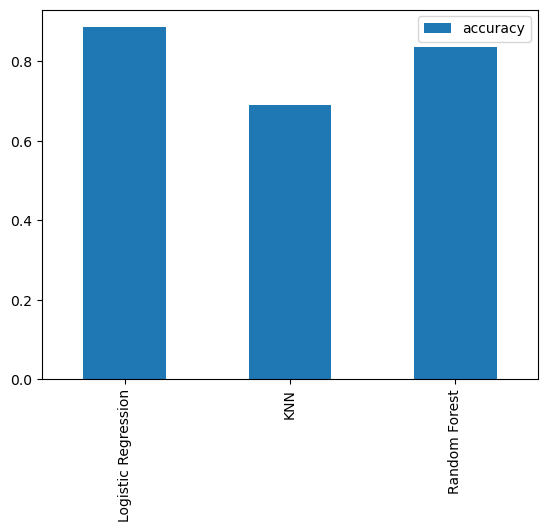

In [33]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar(); #the T included shows them on same basis and colour

We have our baseline accuracy predictions .What should we do next ?

Let's look at the following :
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve

## Hyperparameter tuning

In [34]:
#Let's tune KNN

train_scores = []
test_scores = []

#Create a list of different values for n_neighbors
neighbors = range(1,21)

#Setup KNN instance 
KNN = KNeighborsClassifier()

#Loop through different n_neighbors
for i in neighbors:
    KNN.set_params(n_neighbors=i)
    #Fit the algorithm
    KNN.fit(X_train, y_train)
    # Update the training scores list
    train_scores.append(KNN.score(X_train, y_train))

    #Update the test scores list 
    test_scores.append(KNN.score(X_test, y_test))

In [35]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [36]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


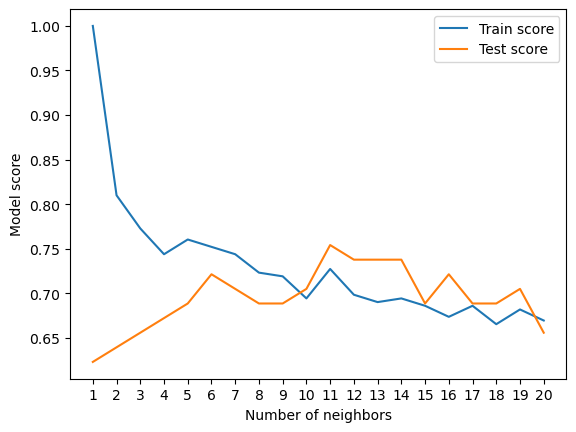

In [37]:
plt.plot(neighbors, train_scores, label ="Train score")
plt.plot(neighbors, test_scores, label = "Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()


print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

Although we got a better accuracy score(75.41) after a bit of tuning the KNN , it's still way below the baseline accuracy for Logistic regressions and RandomForestClassfier, for that reason it'd be dropped 

## Hyperparameter tuning  using RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()
... using RandomizedSearchCV

In [38]:
#Create a hyperparameter grid for logistic regression
log_reg_grid = {"C":np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

#Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(100, 1000, 50),
           "max_depth":[None, 3,5,10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)}
           

In [39]:
#Tune logsitic regression

np.random.seed(42)
rs_log_reg =RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv =5,
                               n_iter=20,
                               verbose=True)

#Fit random hyperrameter search model for logsiticRegression
rs_log_reg.fit(X_train, y_train)
                               

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [40]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [41]:
rs_log_reg.score(X_test, y_test)


0.8852459016393442

We've tuned logisticregression(), WE replicate same for RandomForestClassifier()

In [42]:
#Set up randomseed
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions =rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

#Fit the random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

                        
                            

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700,
       750, 800, 850, 900, 950])},
                   verbose=True)

In [43]:
rs_rf.best_params_

{'n_estimators': 900,
 'min_samples_split': 8,
 'min_samples_leaf': 9,
 'max_depth': 10}

In [44]:
rs_rf.score(X_test, y_test)

0.8688524590163934

In [45]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Hyperparamer Tuning with GridSearchCV

Since our LogisticRegression model provides the best scores s far, we'll try abd improve them again using GridSearchCV.

In [46]:
# Different hyperparameter for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver" : ["liblinear"]}

#Setup grid hyperparameter search fro logistic regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid,
                          cv=5,
                          verbose=True)

#Fit grid hyperparameter search model 
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [47]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [48]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier, beyond accuracy
* ROC curve and AUC score
* Confusion matrix
* Classifcation report
* Precision
* Recall
* F1-score

... we try to use cross validation in areas possible
To make comparisons and evaluate our trained model , we first need to make predictions

In [49]:
#Make predictions with tuned model 
y_preds = gs_log_reg.predict(X_test)

In [50]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [51]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

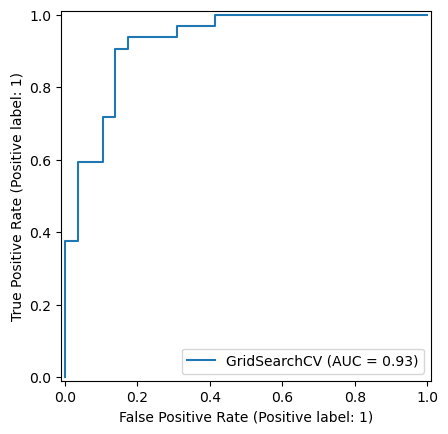

In [52]:
#plot ROC curve and calaculate the AUC metrics
Roc_curve = RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)

In [53]:
#Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


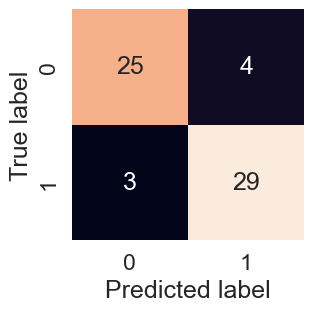

In [54]:
  sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plot a nice looking confusion matrix using seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

plot_conf_mat(y_test,y_preds) 

We've got ROC Curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision and f1-score

In [55]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate multiple evaluation metrics using cross-validation

We're calculating accuracy, precision, recall and f1-score of our model using cross validation

In [56]:
 # Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [57]:
#Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,solver= "liblinear")

In [116]:
# Perfrom further evaluation to find accuracy, precision, recall, f1 score

def calculate_evaluation_metrics(clf,X, y_test, cv=5):
    """
    Calculate multiple evaluation metrics at once.
    
    Parameters:
    - y_true: True labels. here, we use y_test
    - y_pred: Predicted labels.
    
    Returns:
    - A dictionary containing the calculated evaluation metrics.
    """
    metrics = {
        "Accuracy": accuracy_score(y_test, y_preds),
        "Precision": precision_score(y_test, y_preds),
        "Recall": recall_score(y_test, y_preds),
        "F1_score": f1_score(y_test, y_preds)
    }
    
    return metrics

calculate_evaluation_metrics(clf,X, y_test, cv=5)

{'Accuracy': 0.8852459016393442,
 'Precision': 0.8787878787878788,
 'Recall': 0.90625,
 'F1_score': 0.8923076923076924}

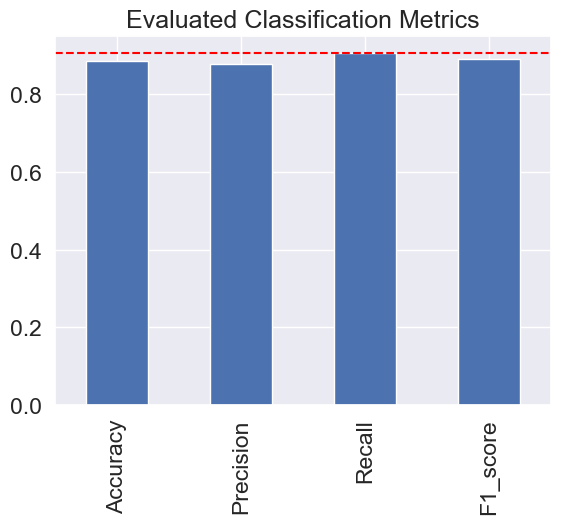

In [144]:
#Visualizing the evalauated metrics 
df_metrics.T.plot.bar(legend = False,
                      title = "Evaluated Classification Metrics")
#Let's set an horizontal line on the recall to create a distinction
line_value = 0.90625  
line_color = 'red'  
line_style = '--' 
# Get the current axes object (assuming the plot is the most recent)
ax = plt.gca()

# Add the horizontal line using axhline
ax.axhline(y=line_value, color=line_color, linestyle=line_style, label='Threshold')

plt.legend().remove()

# Display the plot
plt.show()

### Feature Importance
A way of aksing which features contributed to the outcomes oof the model and how did they contribute?

One way to finnd feature importance is to search(MODEL NAME) feature importance

Finding feature importance is different for each ML model

In [135]:
# Fit an instance of LogisticRegression 
gs_log_reg.best_params_

clf = LogisticRegression(C=0.20433597178569418,solver= "liblinear")
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [136]:
#Check coef_
clf.coef_ #how the coeffcient contributes to our label)

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [137]:
#Match coef's of features to columns
feature_dict =dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

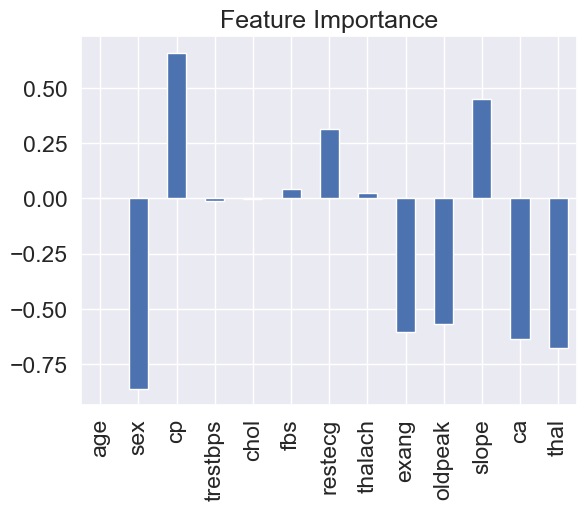

In [138]:
#Visualize feature importance 
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

 ## Experimentation
We haven't been able to hit out accuracy goal of (95%) , the highest we could get thus far is an average (88%).
One could experiment further with a better model possibly `CatBoost` or `XGBoost` to see if we could still get something higher.

However, this classification is limited to using scikitlearn.

## Exporting the model
The last step is to export our model using pickle

In [145]:
from pickle import dump, load
with open("Heart-Disease-Classification-model.pk1", "wb") as f:
    dump(clf, f, protocol=5)

In [ ]:
#with open("Heart-Disease-Classification-model.pk1", "rb") as f:
    #clf = load(f)